In [ ]:
# !pip uninstall rtree
# !sudo apt install libspatialindex-dev
# !pip install rtree

In [ ]:
import pandas as pd


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# VADER (Valence Aware Dictionary and sEntiment Reasoner), a lexicon and rule-based sentiment analysis tool specifically attuned to sentiments 
# expressed in social media was used for the analysis
# The tweets were processed to remove stop words, urls and special characters. Emoticons, capital words and repeated signs were retained because VADER utilizes them to assign sentiment score
# The tweet locations were limited to NYC using NYC zipcode polygon file 

List of data processing/ cleaning to be done on the tweet

1. Only original tweets, remove retweets - filter in query
2. Only english language tweets
3. Remove ads/ commercial tweets
4. keep only tweets with geography <> NULL
5. Remove words like mentions/ stop words etc. but don't remove emoticons and exclamations. The senti analysis understands them

In [ ]:
# getting the original data 
df = pd.read_csv("drive/MyDrive/ADS_ML_Spring_2022/MLC/Data/Twitter Data/Final_Tweets_2M.csv")


In [ ]:
df.head(5)

,tweetUrl,date,content,tweetId,userId,mentionedUsers,coordinates,lat,long
0,https://twitter.com/SharrodSharrod7/status/135...,2021-01-31 23:59:54+00:00,I highly recommend cooking Sunday dinner while...,1.356029e+18,479760616,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.683935,-74.026675
1,https://twitter.com/JPBGerald/status/135602947...,2021-01-31 23:59:54+00:00,@TrijiconMan Pretty sure they're still funny a...,1.356029e+18,23435297,"[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,40.541722,-73.962582
2,https://twitter.com/511NY/status/1356029429798...,2021-01-31 23:59:44+00:00,Cleared: Construction on #JLine Both direction...,1.356029e+18,50706690,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.718315,-73.987437
3,https://twitter.com/azu_musa/status/1356029425...,2021-01-31 23:59:43+00:00,"Monkey the cat aka “the anti-dodo” @ Brooklyn,...",1.356029e+18,465220100,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.650000,-73.950000
4,https://twitter.com/QueenSarahSatur/status/135...,2021-01-31 23:59:42+00:00,and a very light dusting of pedostache. Which ...,1.356029e+18,17843715,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.570842,-74.041878


In [ ]:
import re

def tweet_cleaner(text):
    # #remove RT
    # text = re.sub("RT @[\w]*:","",text)
    #remove twitter handles (@user)
    text = re.sub("(@[A-Za-z0-9_]+)","", text)
    #remove url links
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    # remove whitespaces
    text = ' '.join(text.split())
    return text


#Apply text cleaning function to text column in df_tweets dataframe
df['text'] = df['content'].apply(lambda x:tweet_cleaner(x))
df = df[~df.coordinates.isnull()]
df = df[~(df.text == '')]


In [ ]:
df.head(5)

,tweetUrl,date,content,tweetId,userId,mentionedUsers,coordinates,lat,long,text
0,https://twitter.com/SharrodSharrod7/status/135...,2021-01-31 23:59:54+00:00,I highly recommend cooking Sunday dinner while...,1.356029e+18,479760616,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.683935,-74.026675,I highly recommend cooking Sunday dinner while...
1,https://twitter.com/JPBGerald/status/135602947...,2021-01-31 23:59:54+00:00,@TrijiconMan Pretty sure they're still funny a...,1.356029e+18,23435297,"[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,40.541722,-73.962582,Pretty sure they're still funny among Black fo...
2,https://twitter.com/511NY/status/1356029429798...,2021-01-31 23:59:44+00:00,Cleared: Construction on #JLine Both direction...,1.356029e+18,50706690,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.718315,-73.987437,Cleared: Construction on #JLine Both direction...
3,https://twitter.com/azu_musa/status/1356029425...,2021-01-31 23:59:43+00:00,"Monkey the cat aka “the anti-dodo” @ Brooklyn,...",1.356029e+18,465220100,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.650000,-73.950000,"Monkey the cat aka “the anti-dodo” @ Brooklyn,..."
4,https://twitter.com/QueenSarahSatur/status/135...,2021-01-31 23:59:42+00:00,and a very light dusting of pedostache. Which ...,1.356029e+18,17843715,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.570842,-74.041878,and a very light dusting of pedostache. Which ...


In [ ]:
#5.8 Defining set containing all stopwords in English
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
# STOPWORDS = set(stopwordlist)
# def cleaning_stopwords(text):
#     return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
# df.tail()

In [ ]:
df[['content','text']].head(10)

,content,text
0,I highly recommend cooking Sunday dinner while...,I highly recommend cooking Sunday dinner while...
1,@TrijiconMan Pretty sure they're still funny a...,Pretty sure they're still funny among Black fo...
2,Cleared: Construction on #JLine Both direction...,Cleared: Construction on #JLine Both direction...
3,"Monkey the cat aka “the anti-dodo” @ Brooklyn,...","Monkey the cat aka “the anti-dodo” @ Brooklyn,..."
4,and a very light dusting of pedostache. Which ...,and a very light dusting of pedostache. Which ...
5,@nickzbutcher @salimvalji i’m hopeful you won’...,i’m hopeful you won’t be able to sooner than l...
6,I have thought of so many different beard and ...,I have thought of so many different beard and ...
7,@UglyCalifornia My picks too,My picks too
8,AOC bought stock in Antifa on a socialist dare...,AOC bought stock in Antifa on a socialist dare
9,Literally nothing excites me anymore.,Literally nothing excites me anymore.


In [ ]:
# try out vader library

!pip install vaderSentiment

In [ ]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [ ]:
sid = SentimentIntensityAnalyzer()
df['scores'] = df['text'].apply(lambda text: sid.polarity_scores(text))
df['final_score']  = df['scores'].apply(lambda score_dict: score_dict['compound'])



In [ ]:
df.head()

,tweetUrl,date,content,tweetId,userId,mentionedUsers,coordinates,lat,long,text,scores,final_score
0,https://twitter.com/SharrodSharrod7/status/135...,2021-01-31 23:59:54+00:00,I highly recommend cooking Sunday dinner while...,1.356029e+18,479760616,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.683935,-74.026675,I highly recommend cooking Sunday dinner while...,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.4201
1,https://twitter.com/JPBGerald/status/135602947...,2021-01-31 23:59:54+00:00,@TrijiconMan Pretty sure they're still funny a...,1.356029e+18,23435297,"[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,40.541722,-73.962582,Pretty sure they're still funny among Black fo...,"{'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'comp...",0.8658
2,https://twitter.com/511NY/status/1356029429798...,2021-01-31 23:59:44+00:00,Cleared: Construction on #JLine Both direction...,1.356029e+18,50706690,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.718315,-73.987437,Cleared: Construction on #JLine Both direction...,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.1027
3,https://twitter.com/azu_musa/status/1356029425...,2021-01-31 23:59:43+00:00,"Monkey the cat aka “the anti-dodo” @ Brooklyn,...",1.356029e+18,465220100,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.650000,-73.950000,"Monkey the cat aka “the anti-dodo” @ Brooklyn,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,https://twitter.com/QueenSarahSatur/status/135...,2021-01-31 23:59:42+00:00,and a very light dusting of pedostache. Which ...,1.356029e+18,17843715,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.570842,-74.041878,and a very light dusting of pedostache. Which ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [ ]:
!pip install geopandas

import geopandas as gpd
import matplotlib.pyplot as plt


In [ ]:

df_sa_geo = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['long'], df['lat']))

In [ ]:
df_sa_geo

,tweetUrl,date,content,tweetId,userId,mentionedUsers,coordinates,lat,long,text,scores,final_score,geometry
0,https://twitter.com/SharrodSharrod7/status/135...,2021-01-31 23:59:54+00:00,I highly recommend cooking Sunday dinner while...,1.356029e+18,479760616,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.683935,-74.026675,I highly recommend cooking Sunday dinner while...,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.4201,POINT (-74.02667 40.68393)
1,https://twitter.com/JPBGerald/status/135602947...,2021-01-31 23:59:54+00:00,@TrijiconMan Pretty sure they're still funny a...,1.356029e+18,23435297,"[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,40.541722,-73.962582,Pretty sure they're still funny among Black fo...,"{'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'comp...",0.8658,POINT (-73.96258 40.54172)
2,https://twitter.com/511NY/status/1356029429798...,2021-01-31 23:59:44+00:00,Cleared: Construction on #JLine Both direction...,1.356029e+18,50706690,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.718315,-73.987437,Cleared: Construction on #JLine Both direction...,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.1027,POINT (-73.98744 40.71831)
3,https://twitter.com/azu_musa/status/1356029425...,2021-01-31 23:59:43+00:00,"Monkey the cat aka “the anti-dodo” @ Brooklyn,...",1.356029e+18,465220100,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.650000,-73.950000,"Monkey the cat aka “the anti-dodo” @ Brooklyn,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,POINT (-73.95000 40.65000)
4,https://twitter.com/QueenSarahSatur/status/135...,2021-01-31 23:59:42+00:00,and a very light dusting of pedostache. Which ...,1.356029e+18,17843715,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.570842,-74.041878,and a very light dusting of pedostache. Which ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,POINT (-74.04188 40.57084)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928791,https://twitter.com/nickartdude67/status/13995...,2021-06-01 00:00:43+00:00,@AndylynnPayne They might get pissed off if yo...,1.399516e+18,1925156510,"[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,40.643773,-74.146932,They might get pissed off if you tell them. Be...,"{'neg': 0.206, 'neu': 0.588, 'pos': 0.206, 'co...",0.0000,POINT (-74.14693 40.64377)
1928792,https://twitter.com/cooperlund/status/13995162...,2021-06-01 00:00:40+00:00,"@BernieBonds It’s not manufactured, people leg...",1.399516e+18,22820718,"[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,40.570842,-74.041878,"It’s not manufactured, people legitimately did...","{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp...",0.3400,POINT (-74.04188 40.57084)
1928793,https://twitter.com/lisablas/status/1399516162...,2021-06-01 00:00:29+00:00,"Monday's image: May 31, 2021 https://t.co/hCz...",1.399516e+18,2800270072,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.720756,-74.000761,"Monday's image: May 31, 2021","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,POINT (-74.00076 40.72076)
1928794,https://twitter.com/CurlySueChick19/status/139...,2021-06-01 00:00:29+00:00,My favorite restaurant OF ALL TIME!!! I try to...,1.399516e+18,174088066,"[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,40.683935,-74.026675,My favorite restaurant OF ALL TIME!!! I try to...,"{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'comp...",0.9274,POINT (-74.02667 40.68393)


In [ ]:
# NYC_zip_geo = gpd.read_file("drive/MyDrive/ADS_ML_Spring_2022/MLC/Data/zip_utm_18n/zip_utm.shp")
NYC_zip_geo = gpd.read_file("drive/MyDrive/ADS_ML_Spring_2022/MLC/Data/zip_code_polygon/ZIP_CODE_040114.shp")

NYC_zip_geo.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [ ]:
NYC_zip_geo.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
df_sa_geo = df_sa_geo.set_crs('epsg:4326',allow_override = True)
df_sa_geo = df_sa_geo.to_crs(NYC_zip_geo.crs)

In [ ]:
# NYC_zip_geo = NYC_zip_geo.set_crs("EPSG:4326",allow_override = True)

In [ ]:
NYC_zip_geo.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [ ]:
# spatial join to get zipcode of each tweet

# df_sa_geo = df_sa_geo.to_crs(NYC_zip_geo.crs)

df_sa_geo_fin = gpd.sjoin(df_sa_geo,NYC_zip_geo[['ZIPCODE','geometry']],how = 'inner',predicate = 'within')

In [ ]:
df_sa_geo.shape,df_sa_geo_fin.shape

((1928796, 13), (432229, 15))

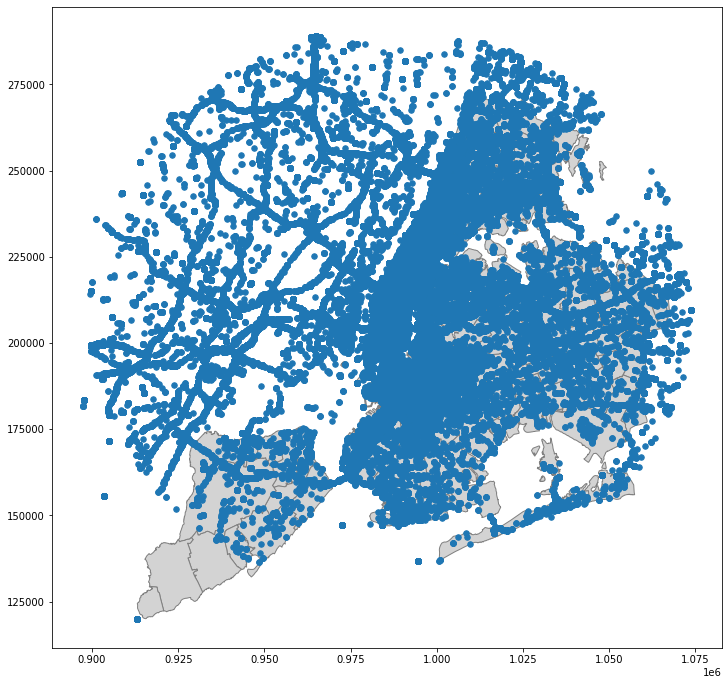

In [ ]:
# fig, ax = plt.subplots(figsize=(12,12))

# NYC_base = gpd.read_file('https://data.beta.nyc/dataset/0ff93d2d-90ba-457c-9f7e-39e47bf2ac5f/resource/35dd04fb-81b3-479b-a074-a27a37888ce7/download/d085e2f8d0b54d4590b1e7d1f35594c1pediacitiesnycneighborhoods.geojson')
# ax.set_aspect('equal')

# # world.plot(ax=ax, color='white', edgecolor='black')
# NYC_zip_geo.plot(ax=ax, color = 'lightgrey',edgecolor = 'grey')
# # df_sa_geo.plot(ax=ax, c=df_sa_geo.final_score, markersize=30)
# df_sa_geo.plot(ax=ax, markersize=30)
# plt.show()



In [ ]:
df_sa_geo_fin.to_csv("drive/MyDrive/ADS_ML_Spring_2022/MLC/Data/twitter_data_with_sentiment_score_final.csv")

In [ ]:
df_sa_geo_fin.head()

,tweetUrl,date,content,tweetId,userId,mentionedUsers,coordinates,lat,long,text,scores,final_score,geometry,index_right,ZIPCODE
2,https://twitter.com/511NY/status/1356029429798...,2021-01-31 23:59:44+00:00,Cleared: Construction on #JLine Both direction...,1.356029e+18,50706690,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.718315,-73.987437,Cleared: Construction on #JLine Both direction...,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.1027,POINT (987732.522 200978.296),92,10002
86,https://twitter.com/ArtCommunityIns/status/135...,2021-01-31 23:50:50+00:00,Just posted a video @ SHIN GALLERY https://t.c...,1.356027e+18,707020496,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.717460,-73.990460,Just posted a video @ SHIN GALLERY,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,POINT (986894.566 200666.687),92,10002
461,https://twitter.com/JohnnyPrimeCC/status/13560...,2021-01-31 23:12:56+00:00,"""They gave those goggles to the right idiot.""\...",1.356018e+18,588564128,"[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,40.713765,-73.977401,"""They gave those goggles to the right idiot."" ...","{'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'comp...",-0.5106,POINT (990515.070 199321.048),92,10002
587,https://twitter.com/RafaelRufus1968/status/135...,2021-01-31 23:03:36+00:00,#SundayDinner\n#grill boneless Pork Chops\n#av...,1.356015e+18,590243316,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,40.716319,-73.982481,#SundayDinner #grill boneless Pork Chops #avoc...,"{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'comp...",-0.2960,POINT (989106.494 200251.328),92,10002
663,https://twitter.com/aczhang0/status/1356013080...,2021-01-31 22:54:46+00:00,Chicken Nuggets and Free Whopper via T-Mobile ...,1.356013e+18,23906978,"[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,40.718345,-73.986579,Chicken Nuggets and Free Whopper via T-Mobile ...,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.5106,POINT (987970.307 200989.079),92,10002
